Data Details: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

## Data wrangling and EDA

1. Read the data
2. See the definition of functions
3. Check first few and last few rows of dataframe
4. Display all columns
6. Display chosen columns only
7. Count number of rows and columns in a dataframe
8. Summary of numeric columns
9. Change the name of few columns
 

In [1]:
import pandas as pd
import numpy as np

In [2]:
## 1. Read the data
## 2. See the definition of functions: Press shift + Tab

path  = 'https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv'

banking_df = pd.read_csv(path)

In [3]:
# 3. Check first few and last few rows of dataframe
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Data Dictionary

1. age (numeric)  
     
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”,   “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)  
  
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)  
  
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”,   “professional.course”, “university.degree”, “unknown”)  
  
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)  
  
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)  
  
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)  

8. contact: contact communication type (categorical: “cellular”, “telephone”)  

9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)  

10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)  

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model  


12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  

14. previous: number of contacts performed before this campaign and for this client (numeric)  

15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)  

16. emp.var.rate: employment variation rate — (numeric)  

17. cons.price.idx: consumer price index — (numeric)  

18. cons.conf.idx: consumer confidence index — (numeric)  

19. euribor3m: euribor 3 month rate — (numeric)  

20. nr.employed: number of employees — (numeric)  

21. y: client  subscribe (1/0) to a term deposit (Target Variable)

In [4]:
## 4. Display all columns
pd.set_option("display.max_columns",22)
banking_df.head()

## Display options are also avaialble for rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
## 6. Display chosen columns only

banking_df[['job', 'education', 'y']].head()

,job,education,y
0,blue-collar,basic.4y,0
1,technician,unknown,0
2,management,university.degree,1
3,services,high.school,0
4,retired,basic.4y,1


In [6]:
## 7. Count number of rows and columns in a dataframe
banking_df.shape

(41188, 21)

In [7]:
## 8. Summary of numeric columns
banking_df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### Observations

* 75% of the customers contacted are under 50 Years of age
* Only 25% of the customers were contcated more than 3 times
* At least 75% of the customers didn't subscribe to term deposit

In [8]:
## 9. Change the name of few columns
banking_df = banking_df.rename(columns = {'euribor3m': 'euribor_3m'})
banking_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## Section 2: Data Exploration and cleaning

1. Distribution of categorical variables
2. Group by 
3. Loc and iloc
4. unique, nunique and value_counts
5. Group by and order
6. Ranking (partition by)
7. Handling missing values

In [9]:
## 1. Distribution of categorical variables

banking_df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [10]:
target_dist = banking_df['y'].value_counts().reset_index()
target_dist['proportion'] = round(target_dist['y']/target_dist['y'].sum(),1)
target_dist

,index,y,proportion
0,0,36548,0.9
1,1,4640,0.1


In [11]:
job_with_target = pd.crosstab(banking_df.job, banking_df.y).reset_index()
job_with_target['add'] = job_with_target[0] + job_with_target[1]
job_with_target['subscribed'] = round(job_with_target[1]/job_with_target['add'],1)
job_with_target['not_subscribed'] = round(job_with_target[0]/job_with_target['add'],1)
job_with_target['contribution'] = round(job_with_target['add']*100/job_with_target['add'].sum(),0)
job_with_target

y,job,0,1,add,subscribed,not_subscribed,contribution
0,admin.,9070,1352,10422,0.1,0.9,25.0
1,blue-collar,8616,638,9254,0.1,0.9,22.0
2,entrepreneur,1332,124,1456,0.1,0.9,4.0
3,housemaid,954,106,1060,0.1,0.9,3.0
4,management,2596,328,2924,0.1,0.9,7.0
5,retired,1286,434,1720,0.3,0.7,4.0
6,self-employed,1272,149,1421,0.1,0.9,3.0
7,services,3646,323,3969,0.1,0.9,10.0
8,student,600,275,875,0.3,0.7,2.0
9,technician,6013,730,6743,0.1,0.9,16.0


<AxesSubplot:xlabel='job'>

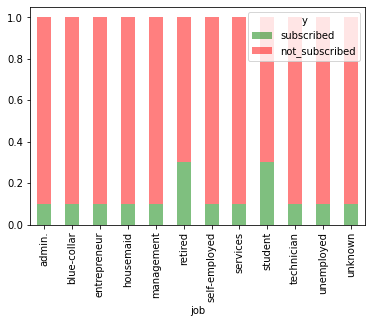

In [15]:
job_with_target1 = job_with_target[['job','subscribed','not_subscribed']].set_index('job')
job_with_target1.plot(kind='bar', stacked=True, color = ['Green', 'Red'], alpha = 0.5)

In [16]:
def categorical_var_data(input_data,col_of_interest, target_var ):
    data = pd.crosstab(input_data[col_of_interest], input_data[target_var]).reset_index()
    data['add'] = data[0] + data[1]
    data['subscribed'] = round(data[1]/data['add'],1)
    data['not_subscribed'] = round(data[0]/data['add'],1)
    data['contribution'] = round(data['add']*100/data['add'].sum(),0)
    return data

In [19]:
def categorical_var_barchart(input_data, col_of_interest):
    data = input_data[[col_of_interest,'subscribed','not_subscribed']].set_index(col_of_interest)
    return data.plot(kind='bar', stacked=True, color = ['Green', 'Red'], alpha = 0.5)
    

In [18]:
job_with_target = categorical_var_data(banking_df, 'job', 'y')
job_with_target

y,job,0,1,add,subscribed,not_subscribed,contribution
0,admin.,9070,1352,10422,0.1,0.9,25.0
1,blue-collar,8616,638,9254,0.1,0.9,22.0
2,entrepreneur,1332,124,1456,0.1,0.9,4.0
3,housemaid,954,106,1060,0.1,0.9,3.0
4,management,2596,328,2924,0.1,0.9,7.0
5,retired,1286,434,1720,0.3,0.7,4.0
6,self-employed,1272,149,1421,0.1,0.9,3.0
7,services,3646,323,3969,0.1,0.9,10.0
8,student,600,275,875,0.3,0.7,2.0
9,technician,6013,730,6743,0.1,0.9,16.0


<AxesSubplot:xlabel='job'>

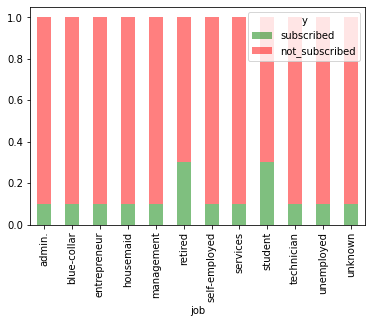

In [20]:
categorical_var_barchart(job_with_target, 'job')

def <<name of the function>>(<parameters>):   
    content of teh function    
    return <what you want to reurn>  

In [21]:
marital_with_target = categorical_var_data(banking_df, 'marital', 'y')
marital_with_target

y,marital,0,1,add,subscribed,not_subscribed,contribution
0,divorced,4136,476,4612,0.1,0.9,11.0
1,married,22396,2532,24928,0.1,0.9,61.0
2,single,9948,1620,11568,0.1,0.9,28.0
3,unknown,68,12,80,0.2,0.8,0.0


<AxesSubplot:xlabel='marital'>

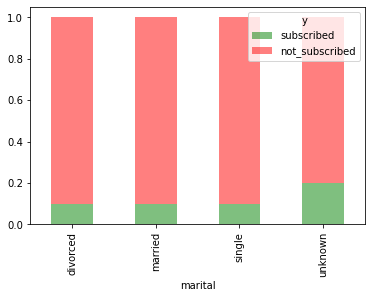

In [22]:
categorical_var_barchart(marital_with_target, 'marital')